# 01 - Carga y Limpieza de Datos de Temperatura Global
### Dataset: NOAA Land and Ocean Temperature Anomalies (1850-2024)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

### 1. Carga de Datos Crudos

In [30]:
# Ruta del archivo
data_path = '../data/raw/Land_and_Ocean_complete.txt'

# Leer el archivo completo para identificar las dos secciones
with open(data_path, 'r') as f:
	lines = f.readlines()

# Encontrar dónde empieza cada sección de datos
section1_start = None  # Air temperature above sea ice
section2_start = None  # Water temperature below sea ice

for i, line in enumerate(lines):
	if '% Year, Month,  Anomaly, Unc.' in line:
		if section1_start is None:
			section1_start = i + 2  # Primera sección
		else:
			section2_start = i + 2  # Segunda sección
			break

print(f"Sección 1 (Aire sobre hielo) empieza en línea: {section1_start}")
print(f"Sección 2 (Agua bajo hielo) empieza en línea: {section2_start}")

# Nombres de columnas
column_names = [
	'Year', 'Month', 
	'Monthly_Anomaly', 'Monthly_Unc',
	'Annual_Anomaly', 'Annual_Unc',
	'Five_Year_Anomaly', 'Five_Year_Unc',
	'Ten_Year_Anomaly', 'Ten_Year_Unc',
	'Twenty_Year_Anomaly', 'Twenty_Year_Unc'
]

# SECCIÓN 1: Air temperature above sea ice (ESTA ES LA QUE USAREMOS PRINCIPALMENTE)
df_air = pd.read_csv(
	data_path,
	skiprows=section1_start,
	nrows=section2_start - section1_start - 7,  # Hasta antes de la sección 2
	sep=r'\s+',
	names=column_names,
	na_values=['NaN']
)

# SECCIÓN 2: Water temperature below sea ice (para comparación opcional)
df_water = pd.read_csv(
	data_path,
	skiprows=section2_start,
	sep=r'\s+',
	names=column_names,
	na_values=['NaN']
)

print(f"\n✅ SECCIÓN 1 (Aire sobre hielo): {df_air.shape}")
print(f"✅ SECCIÓN 2 (Agua bajo hielo): {df_water.shape}")

# Usaremos principalmente df_air (como recomienda Berkeley Earth)
df_raw = df_air.copy()

print(f"\n📊 Dataset principal cargado: {df_raw.shape}")
df_raw.head(10)

Sección 1 (Aire sobre hielo) empieza en línea: 86
Sección 2 (Agua bajo hielo) empieza en línea: 2193

✅ SECCIÓN 1 (Aire sobre hielo): (2100, 12)
✅ SECCIÓN 2 (Agua bajo hielo): (2100, 12)

📊 Dataset principal cargado: (2100, 12)


,Year,Month,Monthly_Anomaly,Monthly_Unc,Annual_Anomaly,Annual_Unc,Five_Year_Anomaly,Five_Year_Unc,Ten_Year_Anomaly,Ten_Year_Unc,Twenty_Year_Anomaly,Twenty_Year_Unc
0,1850,1,-0.753,0.365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.202,0.416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.367,0.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.596,0.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.619,0.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1850,6,-0.332,0.308,-0.436,0.170,NaN,NaN,NaN,NaN,NaN,NaN
6,1850,7,-0.151,0.249,-0.386,0.176,NaN,NaN,NaN,NaN,NaN,NaN
7,1850,8,-0.149,0.341,-0.403,0.166,NaN,NaN,NaN,NaN,NaN,NaN
8,1850,9,-0.416,0.237,-0.418,0.172,NaN,NaN,NaN,NaN,NaN,NaN
9,1850,10,-0.590,0.237,-0.421,0.187,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Exploración Inicial de Datos

In [20]:
# Información general del dataset
print("=" * 70)
print("INFORMACIÓN DEL DATASET")
print("=" * 70)
print(f"\nDimensiones: {df_raw.shape[0]} filas x {df_raw.shape[1]} columnas")
print(f"\nTipos de datos:")
print(df_raw.dtypes)

print("\n" + "=" * 70)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 70)
df_raw.describe()

INFORMACIÓN DEL DATASET

Dimensiones: 2100 filas x 12 columnas

Tipos de datos:
Year                     int64
Month                    int64
Monthly_Anomaly        float64
Monthly_Unc            float64
Annual_Anomaly         float64
Annual_Unc             float64
Five_Year_Anomaly      float64
Five_Year_Unc          float64
Ten_Year_Anomaly       float64
Ten_Year_Unc           float64
Twenty_Year_Anomaly    float64
Twenty_Year_Unc        float64
dtype: object

ESTADÍSTICAS DESCRIPTIVAS


,Year,Month,Monthly_Anomaly,Monthly_Unc,Annual_Anomaly,Annual_Unc,Five_Year_Anomaly,Five_Year_Unc,Ten_Year_Anomaly,Ten_Year_Unc,Twenty_Year_Anomaly,Twenty_Year_Unc
count,2100.000000,2100.000000,2100.000000,2100.000000,2089.000000,2089.000000,2041.000000,2041.000000,1981.000000,1981.000000,1861.000000,1861.000000
mean,1937.000000,6.500000,0.008250,0.122963,0.006026,0.076079,-0.003031,0.060447,-0.013205,0.055177,-0.030026,0.050110
std,50.529356,3.452875,0.432058,0.081854,0.409378,0.045792,0.382501,0.033482,0.361992,0.027495,0.326868,0.022455
min,1850.000000,1.000000,-1.004000,0.030000,-0.598000,0.025000,-0.471000,0.021000,-0.442000,0.019000,-0.375000,0.017000
25%,1893.000000,3.750000,-0.295000,0.049000,-0.296000,0.031000,-0.302000,0.025000,-0.307000,0.023000,-0.307000,0.021000
50%,1937.000000,6.500000,-0.085500,0.116000,-0.108000,0.078000,-0.090000,0.064000,-0.071000,0.060000,-0.062000,0.061000
75%,1981.000000,9.250000,0.219250,0.164000,0.204000,0.090000,0.214000,0.074000,0.147000,0.070000,0.096000,0.066000
max,2024.000000,12.000000,1.548000,0.570000,1.354000,0.300000,1.084000,0.184000,1.027000,0.130000,0.864000,0.103000



VALORES FALTANTES POR COLUMNA
            Columna  Valores_Faltantes  Porcentaje
     Annual_Anomaly                 11    0.523810
         Annual_Unc                 11    0.523810
  Five_Year_Anomaly                 59    2.809524
      Five_Year_Unc                 59    2.809524
   Ten_Year_Anomaly                119    5.666667
       Ten_Year_Unc                119    5.666667
Twenty_Year_Anomaly                239   11.380952
    Twenty_Year_Unc                239   11.380952


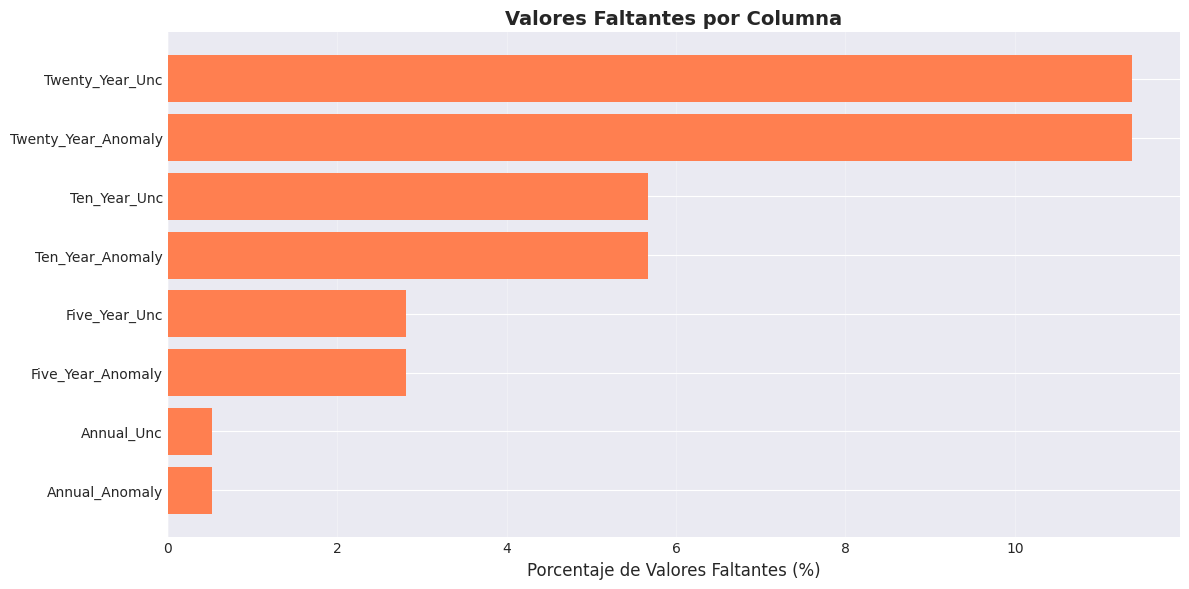

In [21]:
# Verificar valores faltantes
missing_data = df_raw.isnull().sum()
missing_percent = (missing_data / len(df_raw)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})

print("\n" + "=" * 70)
print("VALORES FALTANTES POR COLUMNA")
print("=" * 70)
print(missing_df[missing_df['Valores_Faltantes'] > 0].to_string(index=False))

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
missing_df_plot = missing_df[missing_df['Valores_Faltantes'] > 0]
plt.barh(missing_df_plot['Columna'], missing_df_plot['Porcentaje'], color='coral')
plt.xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
plt.title('Valores Faltantes por Columna', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# Rango temporal
print("\n" + "=" * 70)
print("RANGO TEMPORAL")
print("=" * 70)
print(f"Primer registro: {df_raw['Year'].min()}-{df_raw['Month'].iloc[0]:02d}")
print(f"Último registro: {df_raw['Year'].max()}-{df_raw['Month'].iloc[-1]:02d}")
print(f"Total de meses: {len(df_raw)}")
print(f"Total de años: {df_raw['Year'].nunique()}")
print(f"Años completos: {(df_raw['Year'].max() - df_raw['Year'].min())}")


RANGO TEMPORAL
Primer registro: 1850-01
Último registro: 2024-12
Total de meses: 2100
Total de años: 175
Años completos: 174


### 3. Limpieza y Transformación de Datos

In [23]:
# Crear una copia para trabajar
df = df_raw.copy()

# 1. Crear columna de fecha
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

# 2. Ordenar por fecha
df = df.sort_values('Date').reset_index(drop=True)

# 3. Crear columnas útiles para análisis
df['Decade'] = (df['Year'] // 10) * 10
df['Century'] = (df['Year'] // 100) * 100
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# 4. Crear variables derivadas para análisis de preguntas específicas
df['Is_Positive_Anomaly'] = df['Monthly_Anomaly'] > 0
df['Is_Cold_Month'] = df['Monthly_Anomaly'] < -0.5  # Para pregunta 4
df['Is_Hot_Month'] = df['Monthly_Anomaly'] > 1.0

# 5. Variables para pregunta 2 (Umbrales de París)
df['Above_1C'] = df['Monthly_Anomaly'] > 1.0
df['Above_1_5C'] = df['Monthly_Anomaly'] > 1.5
df['Above_2C'] = df['Monthly_Anomaly'] > 2.0

print("\n✅ Transformaciones completadas")
print(f"Nuevas columnas agregadas: {len(df.columns) - len(df_raw.columns)}")
df.head(10)


✅ Transformaciones completadas
Nuevas columnas agregadas: 10


,Year,Month,Monthly_Anomaly,Monthly_Unc,Annual_Anomaly,Annual_Unc,Five_Year_Anomaly,Five_Year_Unc,Ten_Year_Anomaly,Ten_Year_Unc,...,Date,Decade,Century,Season,Is_Positive_Anomaly,Is_Cold_Month,Is_Hot_Month,Above_1C,Above_1_5C,Above_2C
0,1850,1,-0.753,0.365,NaN,NaN,NaN,NaN,NaN,NaN,...,1850-01-01,1850,1800,Winter,False,True,False,False,False,False
1,1850,2,-0.202,0.416,NaN,NaN,NaN,NaN,NaN,NaN,...,1850-02-01,1850,1800,Winter,False,False,False,False,False,False
2,1850,3,-0.367,0.373,NaN,NaN,NaN,NaN,NaN,NaN,...,1850-03-01,1850,1800,Spring,False,False,False,False,False,False
3,1850,4,-0.596,0.324,NaN,NaN,NaN,NaN,NaN,NaN,...,1850-04-01,1850,1800,Spring,False,True,False,False,False,False
4,1850,5,-0.619,0.267,NaN,NaN,NaN,NaN,NaN,NaN,...,1850-05-01,1850,1800,Spring,False,True,False,False,False,False
5,1850,6,-0.332,0.308,-0.436,0.170,NaN,NaN,NaN,NaN,...,1850-06-01,1850,1800,Summer,False,False,False,False,False,False
6,1850,7,-0.151,0.249,-0.386,0.176,NaN,NaN,NaN,NaN,...,1850-07-01,1850,1800,Summer,False,False,False,False,False,False
7,1850,8,-0.149,0.341,-0.403,0.166,NaN,NaN,NaN,NaN,...,1850-08-01,1850,1800,Summer,False,False,False,False,False,False
8,1850,9,-0.416,0.237,-0.418,0.172,NaN,NaN,NaN,NaN,...,1850-09-01,1850,1800,Fall,False,False,False,False,False,False
9,1850,10,-0.590,0.237,-0.421,0.187,NaN,NaN,NaN,NaN,...,1850-10-01,1850,1800,Fall,False,True,False,False,False,False


In [24]:
# Verificar la calidad de la limpieza
print("\n" + "=" * 70)
print("VERIFICACIÓN POST-LIMPIEZA")
print("=" * 70)
print(f"Registros totales: {len(df):,}")
print(f"Registros duplicados: {df.duplicated(subset=['Year', 'Month']).sum()}")
print(f"Valores nulos en Monthly_Anomaly: {df['Monthly_Anomaly'].isnull().sum()}")

print(f"\n📊 ESTADÍSTICAS DE ANOMALÍAS MENSUALES:")
print(f"  Mínimo: {df['Monthly_Anomaly'].min():.3f}°C")
print(f"  Máximo: {df['Monthly_Anomaly'].max():.3f}°C")
print(f"  Media: {df['Monthly_Anomaly'].mean():.3f}°C")
print(f"  Mediana: {df['Monthly_Anomaly'].median():.3f}°C")
print(f"  Desv. Estándar: {df['Monthly_Anomaly'].std():.3f}°C")

print(f"\n🌡️ DISTRIBUCIÓN DE ANOMALÍAS:")
print(f"  Meses con anomalía positiva: {df['Is_Positive_Anomaly'].sum():,} ({df['Is_Positive_Anomaly'].mean()*100:.1f}%)")
print(f"  Meses con anomalía negativa: {(~df['Is_Positive_Anomaly']).sum():,} ({(~df['Is_Positive_Anomaly']).mean()*100:.1f}%)")
print(f"  Meses fríos (<-0.5°C): {df['Is_Cold_Month'].sum():,}")
print(f"  Meses calientes (>1.0°C): {df['Is_Hot_Month'].sum():,}")


VERIFICACIÓN POST-LIMPIEZA
Registros totales: 2,100
Registros duplicados: 0
Valores nulos en Monthly_Anomaly: 0

📊 ESTADÍSTICAS DE ANOMALÍAS MENSUALES:
  Mínimo: -1.004°C
  Máximo: 1.548°C
  Media: 0.008°C
  Mediana: -0.085°C
  Desv. Estándar: 0.432°C

🌡️ DISTRIBUCIÓN DE ANOMALÍAS:
  Meses con anomalía positiva: 851 (40.5%)
  Meses con anomalía negativa: 1,249 (59.5%)
  Meses fríos (<-0.5°C): 142
  Meses calientes (>1.0°C): 52


### 4. Visualización Rápida de Calidad de Datos

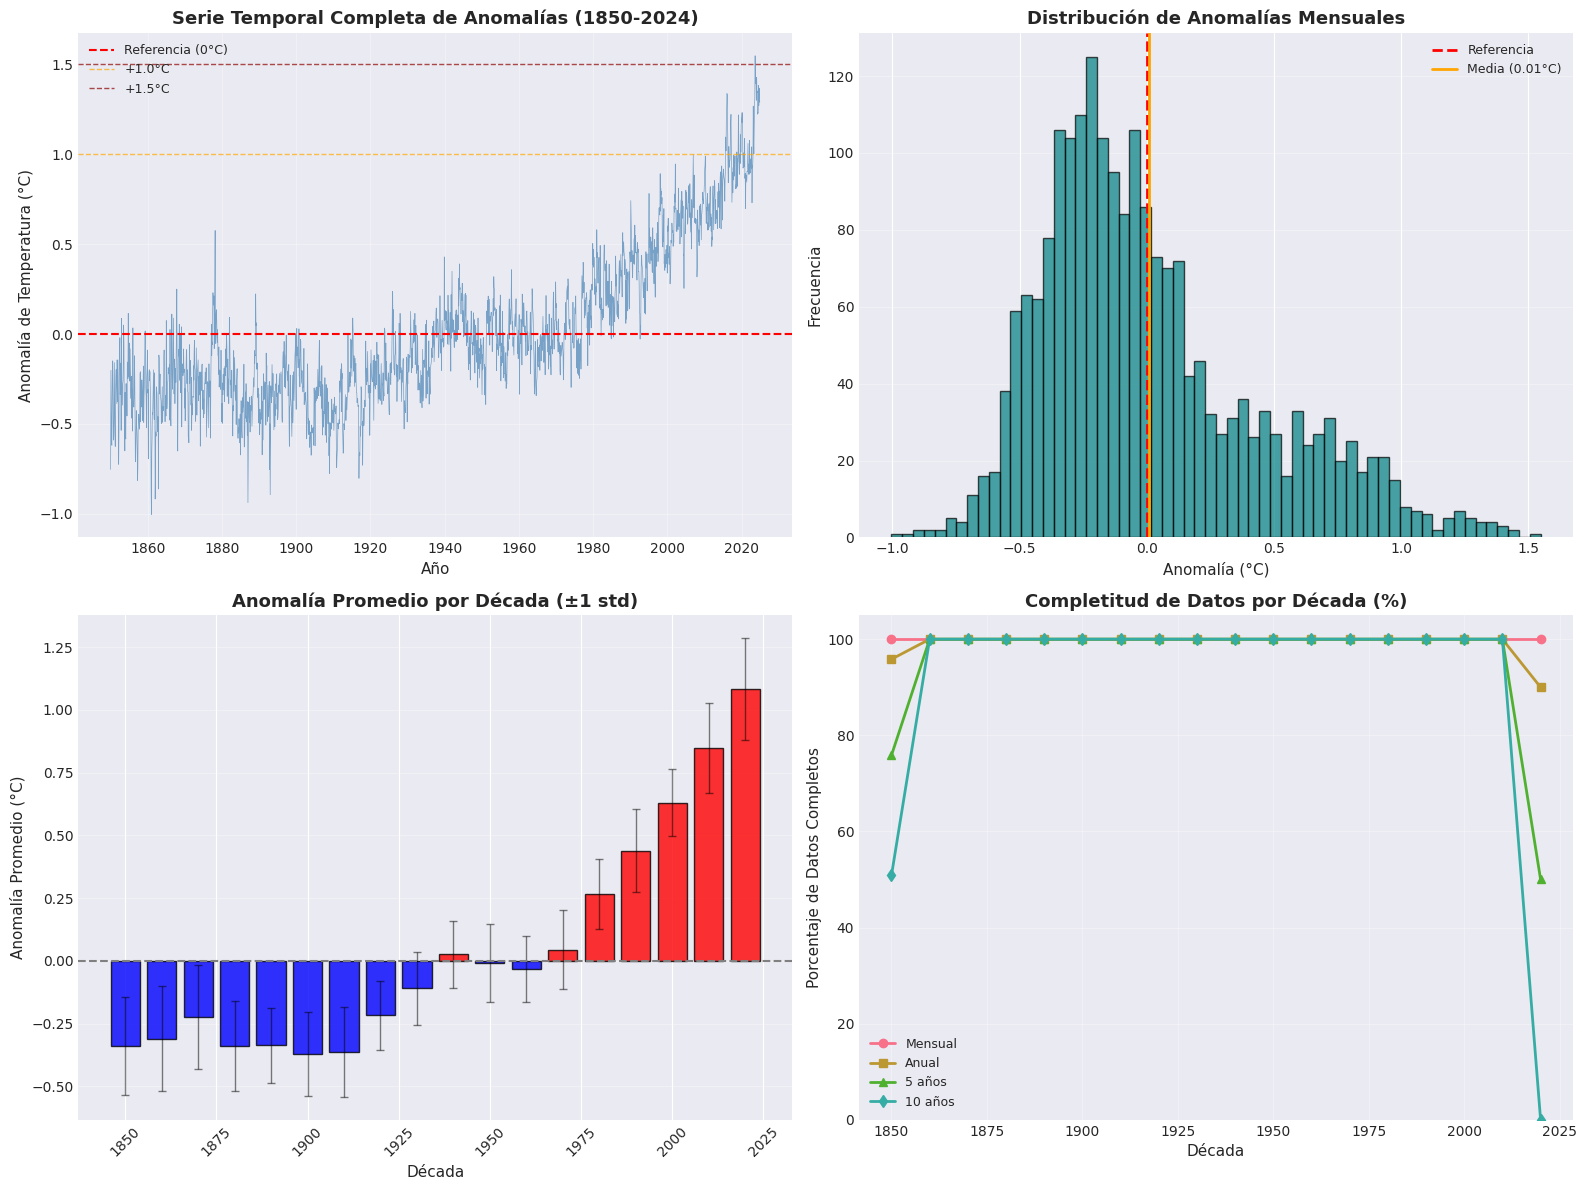


✅ Visualización guardada en: figures/01_data_quality_overview.png


In [25]:
# Crear directorio para figuras si no existe
import os
os.makedirs('../figures', exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Serie temporal completa
axes[0, 0].plot(df['Date'], df['Monthly_Anomaly'], linewidth=0.5, alpha=0.7, color='steelblue')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Referencia (0°C)')
axes[0, 0].axhline(y=1.0, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='+1.0°C')
axes[0, 0].axhline(y=1.5, color='darkred', linestyle='--', linewidth=1, alpha=0.7, label='+1.5°C')
axes[0, 0].set_title('Serie Temporal Completa de Anomalías (1850-2024)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Año', fontsize=11)
axes[0, 0].set_ylabel('Anomalía de Temperatura (°C)', fontsize=11)
axes[0, 0].legend(loc='upper left', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribución de anomalías
axes[0, 1].hist(df['Monthly_Anomaly'].dropna(), bins=60, edgecolor='black', alpha=0.7, color='teal')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Referencia')
axes[0, 1].axvline(x=df['Monthly_Anomaly'].mean(), color='orange', linestyle='-', linewidth=2, label=f'Media ({df["Monthly_Anomaly"].mean():.2f}°C)')
axes[0, 1].set_title('Distribución de Anomalías Mensuales', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Anomalía (°C)', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Anomalías por década
decade_stats = df.groupby('Decade')['Monthly_Anomaly'].agg(['mean', 'std']).reset_index()
colors = ['blue' if x < 0 else 'red' for x in decade_stats['mean']]
axes[1, 0].bar(decade_stats['Decade'], decade_stats['mean'], width=8, 
               color=colors, edgecolor='black', alpha=0.8)
axes[1, 0].errorbar(decade_stats['Decade'], decade_stats['mean'], 
                    yerr=decade_stats['std'], fmt='none', color='black', 
                    capsize=3, alpha=0.5, linewidth=1)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
axes[1, 0].set_title('Anomalía Promedio por Década (±1 std)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Década', fontsize=11)
axes[1, 0].set_ylabel('Anomalía Promedio (°C)', fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Evolución de la completitud de datos
completeness = df.groupby('Decade').apply(
    lambda x: pd.Series({
        'Monthly': x['Monthly_Anomaly'].notna().sum() / len(x) * 100,
        'Annual': x['Annual_Anomaly'].notna().sum() / len(x) * 100,
        'Five_Year': x['Five_Year_Anomaly'].notna().sum() / len(x) * 100,
        'Ten_Year': x['Ten_Year_Anomaly'].notna().sum() / len(x) * 100
    })
).reset_index()

axes[1, 1].plot(completeness['Decade'], completeness['Monthly'], marker='o', linewidth=2, label='Mensual')
axes[1, 1].plot(completeness['Decade'], completeness['Annual'], marker='s', linewidth=2, label='Anual')
axes[1, 1].plot(completeness['Decade'], completeness['Five_Year'], marker='^', linewidth=2, label='5 años')
axes[1, 1].plot(completeness['Decade'], completeness['Ten_Year'], marker='d', linewidth=2, label='10 años')
axes[1, 1].set_title('Completitud de Datos por Década (%)', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Década', fontsize=11)
axes[1, 1].set_ylabel('Porcentaje de Datos Completos', fontsize=11)
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].set_ylim([0, 105])
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/01_data_quality_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualización guardada en: figures/01_data_quality_overview.png")

### 5. Preparación de Subsets para Análisis Específicos

In [26]:
# Dataset completo con anomalías mensuales (para todas las preguntas)
df_monthly = df[['Date', 'Year', 'Month', 'Decade', 'Season', 
                  'Monthly_Anomaly', 'Monthly_Unc', 
                  'Is_Positive_Anomaly', 'Is_Cold_Month', 'Is_Hot_Month',
                  'Above_1C', 'Above_1_5C', 'Above_2C']].copy()

# Dataset con promedios anuales (para pregunta 2, 3, 4)
df_annual = df.groupby('Year').agg({
    'Monthly_Anomaly': 'mean',
    'Annual_Anomaly': 'first',
    'Is_Positive_Anomaly': 'sum',  # Meses con anomalía positiva
    'Is_Cold_Month': 'sum',  # Meses fríos
    'Is_Hot_Month': 'sum',  # Meses calientes
    'Above_1C': 'sum',
    'Above_1_5C': 'sum',
    'Above_2C': 'sum'
}).reset_index()

df_annual.columns = ['Year', 'Monthly_Avg_Anomaly', 'Annual_Anomaly', 
                      'Positive_Months', 'Cold_Months', 'Hot_Months',
                      'Months_Above_1C', 'Months_Above_1_5C', 'Months_Above_2C']

# Dataset por década (para análisis de tendencias)
df_decade = df.groupby('Decade').agg({
    'Monthly_Anomaly': ['mean', 'std', 'min', 'max', 'count'],
    'Is_Cold_Month': 'sum',
    'Is_Hot_Month': 'sum',
    'Is_Positive_Anomaly': 'sum'
}).reset_index()

df_decade.columns = ['Decade', 'Avg_Anomaly', 'Std_Anomaly', 
                      'Min_Anomaly', 'Max_Anomaly', 'Total_Months',
                      'Total_Cold_Months', 'Total_Hot_Months', 'Total_Positive_Months']

print("\n✅ Subsets creados:")
print(f"   - df_monthly: {len(df_monthly):,} registros mensuales")
print(f"   - df_annual: {len(df_annual)} registros anuales")
print(f"   - df_decade: {len(df_decade)} décadas")

print("\n📊 Vista previa de datasets:")
print("\n--- df_annual (primeros 5 años) ---")
print(df_annual.head())
print("\n--- df_decade ---")
print(df_decade)


✅ Subsets creados:
   - df_monthly: 2,100 registros mensuales
   - df_annual: 175 registros anuales
   - df_decade: 18 décadas

📊 Vista previa de datasets:

--- df_annual (primeros 5 años) ---
   Year  Monthly_Avg_Anomaly  Annual_Anomaly  Positive_Months  Cold_Months  \
0  1850            -0.435667          -0.436                0            5   
1  1851            -0.320750          -0.392                0            2   
2  1852            -0.292250          -0.301                1            4   
3  1853            -0.294500          -0.242                1            1   
4  1854            -0.283333          -0.377                1            2   

   Hot_Months  Months_Above_1C  Months_Above_1_5C  Months_Above_2C  
0           0                0                  0                0  
1           0                0                  0                0  
2           0                0                  0                0  
3           0                0                  0            

### 6. Guardar Datos Procesados

In [27]:
# Crear directorio si no existe
os.makedirs('../data/processed', exist_ok=True)

# Guardar datasets
df_monthly.to_csv('../data/processed/monthly_anomalies.csv', index=False)
df_annual.to_csv('../data/processed/annual_anomalies.csv', index=False)
df_decade.to_csv('../data/processed/decade_anomalies.csv', index=False)

# Guardar también el dataset completo limpio
df.to_csv('../data/processed/complete_clean_data.csv', index=False)

# Guardar también la sección de agua (para comparaciones futuras opcionales)
df_water_clean = df_water.copy()
df_water_clean['Date'] = pd.to_datetime(df_water_clean[['Year', 'Month']].assign(Day=1))
df_water_clean.to_csv('../data/processed/water_temperature_data.csv', index=False)

print("✅ Datos procesados guardados exitosamente en: data/processed/")
print("\nArchivos generados:")
print("   📁 monthly_anomalies.csv       - {:,} registros".format(len(df_monthly)))
print("   📁 annual_anomalies.csv        - {} registros".format(len(df_annual)))
print("   📁 decade_anomalies.csv        - {} registros".format(len(df_decade)))
print("   📁 complete_clean_data.csv     - {:,} registros".format(len(df)))
print("   📁 water_temperature_data.csv  - {:,} registros".format(len(df_water_clean)))

✅ Datos procesados guardados exitosamente en: data/processed/

Archivos generados:
   📁 monthly_anomalies.csv       - 2,100 registros
   📁 annual_anomalies.csv        - 175 registros
   📁 decade_anomalies.csv        - 18 registros
   📁 complete_clean_data.csv     - 2,100 registros
   📁 water_temperature_data.csv  - 2,100 registros


### 7. Resumen Final del Procesamiento

In [28]:
print("\n" + "=" * 80)
print("RESUMEN FINAL DE PROCESAMIENTO DE DATOS".center(80))
print("=" * 80)

print(f"\n📊 DATOS ORIGINALES:")
print(f"   • Registros totales: {len(df_raw):,}")
print(f"   • Período: {df_raw['Year'].min()} - {df_raw['Year'].max()}")
print(f"   • Duración: {df_raw['Year'].max() - df_raw['Year'].min() + 1} años")
print(f"   • Columnas originales: {len(df_raw.columns)}")

print(f"\n🧹 LIMPIEZA Y TRANSFORMACIÓN:")
print(f"   • Registros procesados: {len(df):,}")
print(f"   • Columnas añadidas: {len(df.columns) - len(df_raw.columns)}")
print(f"   • Valores nulos en Monthly_Anomaly: {df['Monthly_Anomaly'].isnull().sum()}")
print(f"   • Registros duplicados: {df.duplicated(subset=['Year', 'Month']).sum()}")

print(f"\n📈 ESTADÍSTICAS CLAVE DE ANOMALÍAS:")
print(f"   • Anomalía promedio histórica: {df['Monthly_Anomaly'].mean():+.3f}°C")
print(f"   • Desviación estándar: {df['Monthly_Anomaly'].std():.3f}°C")
print(f"   • Anomalía mínima (más fría): {df['Monthly_Anomaly'].min():.3f}°C")
print(f"   • Anomalía máxima (más caliente): {df['Monthly_Anomaly'].max():.3f}°C")
print(f"   • Rango total: {df['Monthly_Anomaly'].max() - df['Monthly_Anomaly'].min():.3f}°C")

print(f"\n🌡️ DISTRIBUCIÓN HISTÓRICA:")
print(f"   • Meses con anomalía positiva: {df['Is_Positive_Anomaly'].sum():,} ({df['Is_Positive_Anomaly'].mean()*100:.1f}%)")
print(f"   • Meses con anomalía negativa: {(~df['Is_Positive_Anomaly']).sum():,} ({(~df['Is_Positive_Anomaly']).mean()*100:.1f}%)")
print(f"   • Meses muy fríos (<-0.5°C): {df['Is_Cold_Month'].sum():,} ({df['Is_Cold_Month'].mean()*100:.1f}%)")
print(f"   • Meses muy calientes (>+1.0°C): {df['Is_Hot_Month'].sum():,} ({df['Is_Hot_Month'].mean()*100:.1f}%)")

print(f"\n🎯 UMBRALES DE PARÍS (basados en datos mensuales):")
print(f"   • Meses por encima de +1.0°C: {df['Above_1C'].sum():,} ({df['Above_1C'].mean()*100:.1f}%)")
print(f"   • Meses por encima de +1.5°C: {df['Above_1_5C'].sum():,} ({df['Above_1_5C'].mean()*100:.1f}%)")
print(f"   • Meses por encima de +2.0°C: {df['Above_2C'].sum():,} ({df['Above_2C'].mean()*100:.1f}%)")

print(f"\n📦 DATASETS GENERADOS:")
print(f"   • monthly_anomalies.csv - {len(df_monthly):,} registros mensuales")
print(f"   • annual_anomalies.csv - {len(df_annual)} años completos")
print(f"   • decade_anomalies.csv - {len(df_decade)} décadas")
print(f"   • complete_clean_data.csv - Dataset completo con {len(df.columns)} columnas")
print(f"   • water_temperature_data.csv - Datos alternativos (agua bajo hielo)")

print(f"\n✅ LISTO PARA ANÁLISIS ESPECÍFICOS:")
print(f"   🎯 Pregunta 2: Umbrales de París (+1.0°C, +1.5°C, +2.0°C)")
print(f"   ❄️  Pregunta 4: Desaparición del frío")
print(f"   🌡️  Pregunta 3: Récords de temperatura")
print(f"   ⏱️  Pregunta 10: Proyecciones futuras")
print(f"   🔴 Pregunta 7: Eventos extremos")

print("\n" + "=" * 80)
print("Siguiente paso: Ejecutar notebooks de análisis específicos".center(80))
print("=" * 80 + "\n")


                    RESUMEN FINAL DE PROCESAMIENTO DE DATOS                     

📊 DATOS ORIGINALES:
   • Registros totales: 2,100
   • Período: 1850 - 2024
   • Duración: 175 años
   • Columnas originales: 12

🧹 LIMPIEZA Y TRANSFORMACIÓN:
   • Registros procesados: 2,100
   • Columnas añadidas: 10
   • Valores nulos en Monthly_Anomaly: 0
   • Registros duplicados: 0

📈 ESTADÍSTICAS CLAVE DE ANOMALÍAS:
   • Anomalía promedio histórica: +0.008°C
   • Desviación estándar: 0.432°C
   • Anomalía mínima (más fría): -1.004°C
   • Anomalía máxima (más caliente): 1.548°C
   • Rango total: 2.552°C

🌡️ DISTRIBUCIÓN HISTÓRICA:
   • Meses con anomalía positiva: 851 (40.5%)
   • Meses con anomalía negativa: 1,249 (59.5%)
   • Meses muy fríos (<-0.5°C): 142 (6.8%)
   • Meses muy calientes (>+1.0°C): 52 (2.5%)

🎯 UMBRALES DE PARÍS (basados en datos mensuales):
   • Meses por encima de +1.0°C: 52 (2.5%)
   • Meses por encima de +1.5°C: 1 (0.0%)
   • Meses por encima de +2.0°C: 0 (0.0%)

📦 DATASETS G